In [1]:
import pandas as pd
import numpy as np


from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, auc,roc_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [31]:
train1 = pd.read_csv(r'E:\project\FINAL\features.csv')
train1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,6,5,6,6,maths,Poor,Always Regular,Failure,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,4,5,5,6,maths,Poor,Always Regular,Failure,Failure
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,10,7,8,10,maths,Poor,Mostly Regular,Poor,Poor
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,2,15,14,15,maths,Good,Always Regular,Good,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,4,6,10,10,maths,Poor,Always Regular,Poor,Poor


In [32]:
X_train = train1.drop(labels=['G3','FinalGrade','school', 'subject'],axis=1)
X_train = pd.get_dummies(X_train)
X_train.columns
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,0,0,0,1,0,0,0
2,15,1,1,1,2,3,4,3,2,2,...,0,0,0,1,0,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,0,0,0,0,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,0,0,1,0


In [33]:
Y_train = train1['FinalGrade']
Y_train.head(10)

0            Poor
1            Poor
2            Poor
3            Good
4            Poor
5            Good
6    Satisfactory
7            Poor
8       Excellent
9            Good
Name: FinalGrade, dtype: object

In [34]:
test1 = pd.read_csv(r'E:\project\FINAL\featureseca.csv')
test1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,ECA,F,22,U,LE3,T,4,4,teacher,other,...,5,7,18,19,19,DSP,Excellent,Always Regular,Excellent,Excellent
1,ECA,F,23,R,LE3,T,4,4,at_home,other,...,5,10,0,0,0,DSP,Failure,Mostly Regular,Failure,Failure
2,ECA,F,22,R,GT3,T,4,4,at_home,other,...,5,9,17,20,18,DSP,Excellent,Always Regular,Good,Excellent
3,ECA,F,22,U,GT3,T,4,4,services,services,...,5,6,17,18,16,DSP,Good,Always Regular,Good,Excellent
4,ECA,M,22,U,GT3,T,4,4,teacher,services,...,5,8,10,12,14,DSP,Satisfactory,Always Regular,Poor,Satisfactory


In [35]:
X_test = test1.drop(labels=['G3','FinalGrade','school', 'subject'],axis=1)
X_test = pd.get_dummies(X_test)
X_test.head()
#X_test.columns

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,22,4,4,3,2,0,4,3,3,1,...,1,0,0,0,0,1,0,0,0,0
1,23,4,4,4,2,0,5,4,4,1,...,0,1,0,0,0,0,1,0,0,0
2,22,4,4,2,2,0,5,4,3,1,...,0,0,1,0,0,1,0,0,0,0
3,22,4,4,2,2,0,5,4,3,1,...,0,0,1,0,0,1,0,0,0,0
4,22,4,4,2,2,0,4,4,4,1,...,0,0,0,1,0,0,0,0,0,1


In [36]:
Y_test = test1['FinalGrade']
Y_test.head(10)

0       Excellent
1         Failure
2       Excellent
3            Good
4    Satisfactory
5       Excellent
6            Good
7            Poor
8    Satisfactory
9    Satisfactory
Name: FinalGrade, dtype: object

In [37]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(395, 70)
(395,)
(59, 70)
(59,)


In [38]:
#Defining learning classifiers

names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD", "Logistic Regression", "XGBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2"),
    LogisticRegression(),
    XGBClassifier(learning_rate=0.1,n_estimators=100)]

In [39]:
 #Build Model, Apply Model on Test Data & Record Accuracy Scores

from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
model_cols = []
scores1 = []
scores2 = []
f1scores = []
recalls1 = []
precisions1 = []
#mf1scores = []
df=pd.DataFrame(columns=model_cols)
index=0

for name, clf in zip(names, classifiers):
    clf.fit(X_train,Y_train)
    df.loc[index,'Classifiers'] = name
    
    
    score11 = clf.score(X_train, Y_train)
    scores1.append(score11)
    
  
    score22 = clf.score(X_test, Y_test)
    scores2.append(score22)
    
    f1score1 = f1_score(Y_test,clf.predict(X_test), average="macro")
    f1scores.append(f1score1)
    
    report = classification_report(Y_test, clf.predict(X_test), output_dict=True)
    #macro_precision =  report['macro avg']['precision'] 
    #macro_recall = report['macro avg']['recall']    
    #macro_f1 = report['macro avg']['f1-score']
    
    recall11 = report['macro avg']['recall'] 
    recalls1.append(recall11)
    
    precision11 = report['macro avg']['precision'] 
    precisions1.append(precision11)
    
    #macrof11 = report['macro avg']['f1-score'] 
    #mf1scores.append(macrof11)
    
    

    df.loc[index,'Train Accuracy'] = clf.score(X_train,Y_train)
    df.loc[index,'Test Accuracy'] = clf.score(X_test,Y_test)
    #df.loc[index,'Precision'] = precision(X_test,clf.predict(X_test))
    #df.loc[index,'Recall'] = recall(Y_test,clf.predict(Y_test))
    df.loc[index,'F1 Score'] = f1_score(Y_test,clf.predict(X_test), average="macro")
    index+=1
    

In [40]:
import pandas as pd
import seaborn as sns
# Create data frame of model performance

df = pd.DataFrame()
df['name'] = names
df['Train accuracy'] = scores1
df['Test accuracy'] = scores2
df['f1 Score'] = f1scores
#df['macrof1 Score'] = mf1scores
df['recall'] = recalls1
df['precision'] = precisions1
df


,name,Train accuracy,Test accuracy,f1 Score,recall,precision
0,Nearest_Neighbors,0.868354,0.559322,0.439884,0.461968,0.447609
1,Linear_SVM,0.865823,0.440678,0.481544,0.571670,0.579394
2,Polynomial_SVM,0.531646,0.372881,0.199234,0.281739,0.154211
3,RBF_SVM,1.000000,0.169492,0.057971,0.200000,0.033898
4,Gaussian_Process,0.891139,0.508475,0.426239,0.511167,0.432020
5,Gradient_Boosting,1.000000,0.542373,0.589149,0.694050,0.557576
6,Decision_Tree,0.918987,0.474576,0.544194,0.644302,0.532323
7,Extra_Trees,1.000000,0.525424,0.560357,0.681693,0.527778
8,Random_Forest,0.863291,0.508475,0.578143,0.684302,0.560128
9,Neural_Net,0.997468,0.457627,0.489108,0.565080,0.490686


In [41]:
#Adding colors to the data frame


cm = sns.light_palette("red", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,Train accuracy,Test accuracy,f1 Score,recall,precision
0,Nearest_Neighbors,0.868354,0.559322,0.439884,0.461968,0.447609
1,Linear_SVM,0.865823,0.440678,0.481544,0.571670,0.579394
2,Polynomial_SVM,0.531646,0.372881,0.199234,0.281739,0.154211
3,RBF_SVM,1.000000,0.169492,0.057971,0.200000,0.033898
4,Gaussian_Process,0.891139,0.508475,0.426239,0.511167,0.432020
5,Gradient_Boosting,1.000000,0.542373,0.589149,0.694050,0.557576
6,Decision_Tree,0.918987,0.474576,0.544194,0.644302,0.532323
7,Extra_Trees,1.000000,0.525424,0.560357,0.681693,0.527778
8,Random_Forest,0.863291,0.508475,0.578143,0.684302,0.560128
9,Neural_Net,0.997468,0.457627,0.489108,0.565080,0.490686


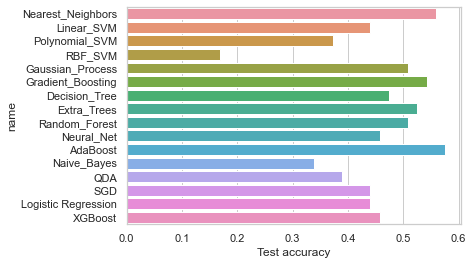

In [42]:
#Bar plot of model performance

sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="Test accuracy", data=df)